<a href="https://colab.research.google.com/github/xpewa/Technopark_ML/blob/main/ML_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from lightgbm import LGBMRegressor, LGBMClassifier
!pip3 install catboost
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/xpewa/Technopark_ML/main/data/Train.csv', index_col=0)
test_df = pd.read_csv('https://raw.githubusercontent.com/xpewa/Technopark_ML/main/data/Test.csv', index_col=0)
SampleSubmission = pd.read_csv('https://raw.githubusercontent.com/xpewa/Technopark_ML/main/data/SampleSubmission.csv', index_col=0)

train_df

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
id,,,,,,,,,,,,,,,,,,,,,,,,
0,2011-1,30,0.0,10,48,2,0,30.0,NaN,4,0,1,0,0,0,0,0,0,0,0,0,0,0,4252000
1,2011-1,376,1.0,2,53,2,0,30.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4463000
2,2011-1,549,NaN,8,61,3,1,30.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4518000
3,2011-1,321,1.0,10,47,1,1,30.0,0.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,6785000
4,2011-1,636,NaN,3,58,3,0,25.0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1677000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2012-3,327,0.0,9,37,1,0,25.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3198000
99996,2012-3,249,0.0,2,33,1,0,20.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2366000
99997,2012-3,537,NaN,3,61,3,0,30.0,NaN,6,1,1,0,0,0,0,0,0,0,0,0,0,0,3816000


In [ ]:
LE = LabelEncoder()

In [ ]:
train_df.date = LE.fit_transform([i[0:5] for i in train_df.date.tolist()])

train_df.build_tech = LE.fit_transform(train_df.build_tech)
train_df.metro_dist = LE.fit_transform(train_df.metro_dist)
train_df.g_lift = LE.fit_transform(train_df.g_lift)

train_df

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,30,0.0,10,48,2,0,30.0,1.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,4252000
1,0,376,1.0,2,53,2,0,30.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4463000
2,0,549,1.0,8,61,3,1,30.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4518000
3,0,321,1.0,10,47,1,1,30.0,0.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,6785000
4,0,636,0.0,3,58,3,0,25.0,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1677000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,327,0.0,9,37,1,0,25.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3198000
99996,1,249,0.0,2,33,1,0,20.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2366000
99997,1,537,0.0,3,61,3,0,30.0,0.0,6,1,1,0,0,0,0,0,0,0,0,0,0,0,3816000


Посмотрим, как связаны разные характеристики и цена и избавимся от выбросов

In [ ]:
def visualize(x, xlabel, y, ylabel):
    plt.style.use('ggplot')
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x, y, label=ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    plt.show()

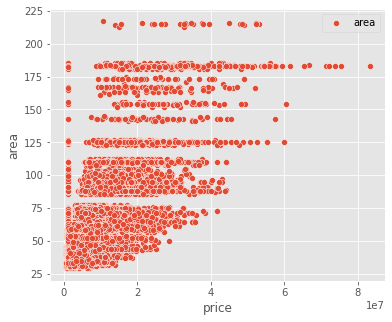

In [ ]:
visualize(train_df.price, "price", train_df.area, "area")

In [ ]:
train_df = train_df.drop(train_df.index[train_df['price'] == train_df[train_df['area'] > 75].price.min()], axis=0)
train_df = train_df.drop(train_df.index[train_df['area'] > 200], axis=0)

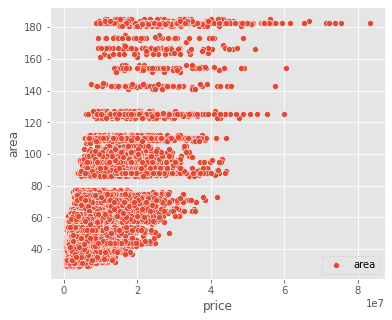

In [ ]:
visualize(train_df.price, "price", train_df.area, "area")

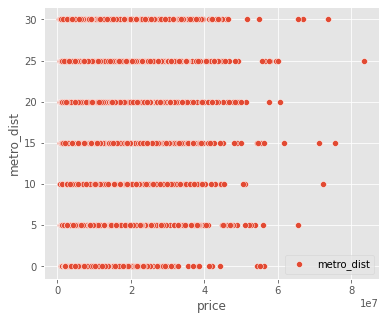

In [ ]:
visualize(train_df.price, "price", train_df.metro_dist, "metro_dist")

In [ ]:
train_df = train_df.drop(train_df.index[train_df['price'] > 7*10**7], axis=0)

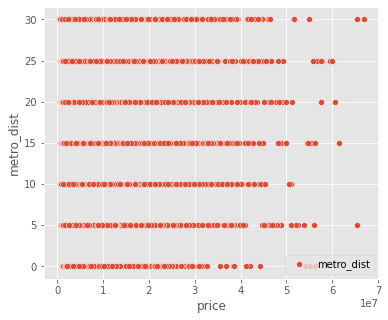

In [ ]:
visualize(train_df.price, "price", train_df.metro_dist, "metro_dist")

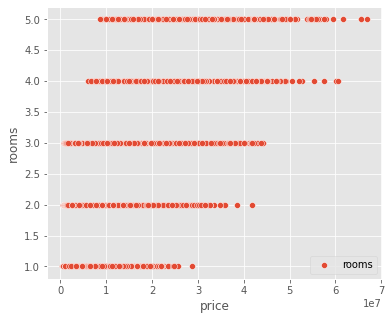

In [ ]:
visualize(train_df.price, "price", train_df.rooms, "rooms")

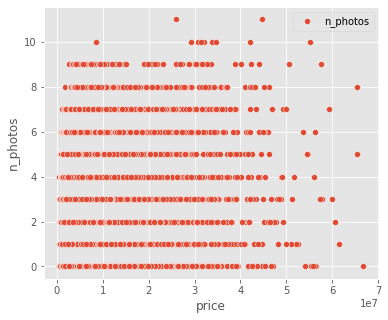

In [ ]:
visualize(train_df.price, "price", train_df.n_photos, "n_photos")

In [ ]:
train_df = train_df.drop(train_df.index[train_df['n_photos'] >= 10], axis=0)

In [ ]:
Y_train = train_df.price
X_train = train_df.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=100)

Сравним модели

In [ ]:
LGBM = LGBMRegressor(n_estimators=1000, learning_rate=0.2)
LGBM.fit(x_train, y_train)
LGBM_answer = LGBM.predict(x_test)

LGBM_predict = LGBM.predict(x_train)

mean_absolute_error(y_test, LGBM_answer) #1236925

1199401.015822364

In [ ]:
DTC = DecisionTreeRegressor()
DTC.fit(x_train, y_train)
DTC_answer = DTC.predict(x_test)

DTC_predict = DTC.predict(x_train)

mean_absolute_error(y_test, DTC_answer)

1912188.2056626715

In [ ]:
RFC = RandomForestRegressor(n_estimators=600, random_state=100, min_samples_leaf=5)
RFC.fit(x_train, y_train)
RFC_answer = RFC.predict(x_test)

RFC_predict = RFC.predict(x_train)

mean_absolute_error(y_test, RFC_answer)

1523353.0521515177

In [ ]:
CBR = CatBoostRegressor(max_depth=11, verbose=0)
CBR.fit(x_train, y_train)
CBR_answer = CBR.predict(x_test)

CBR_predict = CBR.predict(x_train)

mean_absolute_error(y_test, CBR_answer) #1276507

1273336.4646037223

In [ ]:
BDT = BaggingRegressor(DecisionTreeRegressor()).fit(x_train, y_train)
BDT_answer = BDT.predict(x_test)

mean_absolute_error(y_test, BDT_answer)

1558018.0966525222

In [ ]:
x_train.insert(x_train.shape[1], 'LGBM', np.round(LGBM_predict))
#x_train.insert(x_train.shape[1], 'DTC', np.round(DTC_predict))
#x_train.insert(x_train.shape[1], 'RFC', np.round(RFC_predict))
x_train.insert(x_train.shape[1], 'CBR', np.round(CBR_predict))
    
x_test.insert(x_test.shape[1], 'LGBM', np.round(LGBM_answer))
#x_test.insert(x_test.shape[1], 'DTC', np.round(DTC_answer))
#x_test.insert(x_test.shape[1], 'RFC', np.round(RFC_answer))
x_test.insert(x_test.shape[1], 'CBR', np.round(CBR_answer))

In [ ]:
LGBM = LGBMRegressor(n_estimators=500)
LGBM.fit(x_train, y_train)
LGBM_answer = LGBM.predict(x_test)

mean_absolute_error(y_test, LGBM_answer) 

1126951.3264841174

In [ ]:
test_df.date = LE.fit_transform([i[0:5] for i in test_df.date.tolist()])

test_df.build_tech = LE.fit_transform(test_df.build_tech)
test_df.metro_dist = LE.fit_transform(test_df.metro_dist)
test_df.g_lift = LE.fit_transform(test_df.g_lift)

In [ ]:
LGBM = LGBMRegressor(n_estimators=1000, learning_rate=0.2)
LGBM.fit(X_train, Y_train)
LGBM_answer = LGBM.predict(test_df)
LGBM_predict = LGBM.predict(X_train)

CBR = CatBoostRegressor(max_depth=11, verbose=0)
CBR.fit(X_train, Y_train)
CBR_answer = CBR.predict(test_df)
CBR_predict = CBR.predict(X_train)

In [ ]:
X_train.insert(X_train.shape[1], 'LGBM', np.round(LGBM_predict))
X_train.insert(X_train.shape[1], 'CBR', np.round(CBR_predict))

test_df.insert(test_df.shape[1], 'LGBM', np.round(LGBM_answer))
test_df.insert(test_df.shape[1], 'CBR', np.round(CBR_answer))

In [ ]:
LGBM = LGBMRegressor(n_estimators=1000, learning_rate=0.2)
LGBM.fit(X_train, Y_train)
LGBM_answer = LGBM.predict(test_df)

In [ ]:
SampleSubmission.price = np.round(LGBM_answer, 2)
SampleSubmission.to_csv('MySubmission.csv')
SampleSubmission.head()

,price
id,
100000,3600017.70
100001,864439.48
100002,7297584.65
100003,11977721.84
100004,7029425.16


In [ ]:
from google.colab import files

files.download('MySubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>